<a href="https://colab.research.google.com/github/Sujal-vajire/Machine-learning-models/blob/main/SRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset1.csv',)

In [33]:
data.tail()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
32681,1480587604,12-01-2016 00:00,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12-01-2016 00:00,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12-01-2016 00:00,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12-01-2016 00:00,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00
32685,1480586402,12-01-2016 00:00,00:00:02,1.20,44,30.43,101,83.59,3.37,06:41:00,17:42:00


In [4]:
scaled_data = data[['UNIXTime','Radiation']].iloc[:31000,:]
scaled_data.set_index('UNIXTime',drop=True,inplace=True)
scaled_data.tail()

,Radiation
UNIXTime,
1481318139,120.52
1481317850,107.32
1481317540,144.85
1481317251,179.73
1481316953,193.00


In [5]:
MMS = MinMaxScaler()
scaled_data[scaled_data.columns] = MMS.fit_transform(scaled_data)
scaled_data.head()

,Radiation
UNIXTime,
1475229326,0.000062
1475229023,0.000062
1475228726,0.000075
1475228421,0.000062
1475228124,0.000037


In [6]:
from keras.layers import Bidirectional,LSTM,Dense,Flatten,Conv1D,MaxPooling1D,Dropout,RepeatVector
from keras.models import Sequential
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stop=EarlyStopping(monitor='loss',patience=5)

In [7]:
model=Sequential([Conv1D(100,kernel_size=3,input_shape=(30,1),activation='relu'),
                  Conv1D(100,kernel_size=3),
                  Conv1D(100,kernel_size=3),
                  MaxPooling1D(2),
                 Flatten(),
                  RepeatVector(30),
                 LSTM(128,activation='relu',return_sequences=True),
                 LSTM(128,activation='relu',return_sequences=True),
                  Bidirectional(LSTM(64,activation='relu')),
                 Dense(128,activation='relu'),
                 Dense(1)])

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [8]:
def create_sequence(dataset,sequence_len):
  sequences = []
  labels = []
  start_idx = 0
  for stop_idx in range(sequence_len,len(dataset)): 
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [9]:
new_df1=pd.DataFrame(list(data['Radiation']), index=data['UNIXTime'], columns=['Rad'])

In [10]:
new_df1

,Rad
UNIXTime,
1475229326,1.21
1475229023,1.21
1475228726,1.23
1475228421,1.21
1475228124,1.17
...,...
1480587604,1.22
1480587301,1.17
1480587001,1.20


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(-1,1))

In [12]:
scaled_data=scaler.fit_transform(new_df1)
scaled_data[:5]

array([[-0.99987501],
       [-0.99987501],
       [-0.99985001],
       [-0.99987501],
       [-0.99992501]])

In [13]:
steps=30
inp1=[]
out1=[]

for i in range(len(scaled_data)-steps):
    inp1.append(scaled_data[i:i+steps])
    out1.append(scaled_data[i+steps])

In [14]:
inp1=np.asanyarray(inp1)
out1=np.asanyarray(out1)
x_train1=inp1[:500,:,:]
x_test1=inp1[500:,:,:]
y_train1=out1[:500]
y_test1=out1[500:]

In [30]:
history = model.fit(x_train1, y_train1, epochs=20, validation_data = (x_test1, y_test1), verbose = 1)

Epoch 1/20
16/16 [==============================] - 61s 4s/step - loss: 9.5454e-04 - accuracy: 0.0000e+00 - val_loss: 0.0155 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 67s 4s/step - loss: 0.0010 - accuracy: 0.0000e+00 - val_loss: 0.0153 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 61s 4s/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0179 - val_accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 61s 4s/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0153 - val_accuracy: 0.0000e+00
Epoch 5/20
16/16 [==============================] - 60s 4s/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0153 - val_accuracy: 0.0000e+00
Epoch 6/20
16/16 [==============================] - 62s 4s/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0158 - val_accuracy: 0.0000e+00
Epoch 7/20
16/16 [==============================] - 61s 4s/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_

In [24]:
predicted=model.predict(x_test1)

In [25]:
predicted1=scaler.inverse_transform(predicted)

In [26]:
y_test2=scaler.inverse_transform(y_test1)

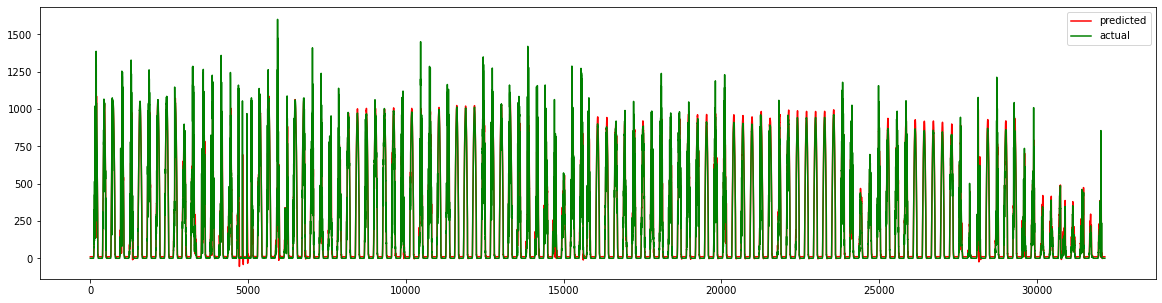

In [27]:
plt.figure(figsize=(20,5))
plt.plot(predicted1,'r',label='predicted')
plt.plot(y_test2,'g',label='actual')
plt.legend()
plt.show()

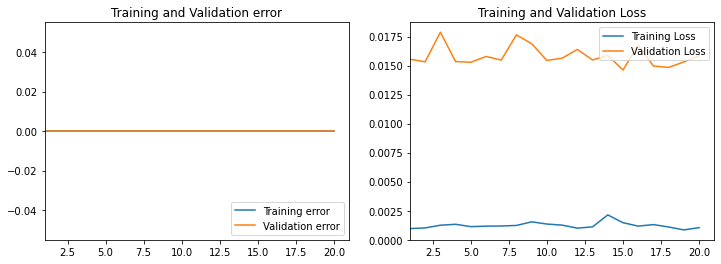

In [31]:
error = history.history['accuracy']
val_error = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(val_error)+1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, error, label='Training error')
plt.plot(epochs_range, val_error, label='Validation error')
plt.legend(loc='lower right')
plt.xlim(1, len(val_error)+1)
plt.title('Training and Validation error')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(1, len(val_error)+1)
plt.title('Training and Validation Loss')
plt.show()

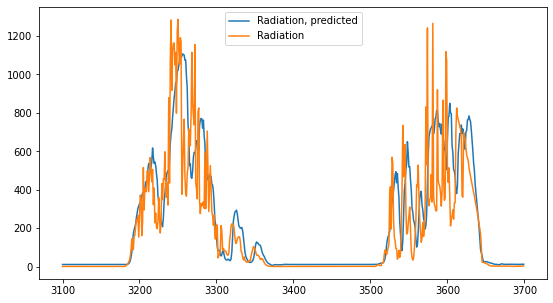

In [39]:
fig=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(np.arange(3100,3700),predicted1[3100:3700],label='Radiation, predicted')
plt.plot(np.arange(3100,3700),y_test2[3100:3700],label="Radiation")
plt.legend()

In [48]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(predicted1,y_test2))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 100.95669134306806
